## Gather

In [715]:
# importing all packages
import pandas as pd
import numpy as np
import os
import wptools
import tweepy
import requests
import json
import matplotlib.pyplot as plt

In [716]:
# Making a folder to save the downloaded file
folder_name = 'twit_data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [717]:
# All the text in the text file is now in our computers memory in r variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r.status_code

200

In [718]:
# Now saving the file to our computer
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)
os.listdir(folder_name)    

['image-predictions.tsv']

In [719]:
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [720]:
# Now uploading the twitter archive enhanced file to pandas data frame
twitter_archive_file = pd.read_csv('twitter-archive-enhanced.csv')

In [721]:
# making list of twitter ids from twitter archive file
tweet_id_list = []
for i in twitter_archive_file['tweet_id']:
    tweet_id_list.append(i)
# or list(twitter_archive_file.tweet_id)

In [722]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweets_written = []
tweets_empty = []

for j in tweet_id_list:
    try:
        rank = tweet_id_list.index(j)+1
        tweet = api.get_status(j, tweet_mode = 'extended')
        tweets_written.append(tweet._json)
    except Exception as msg:
        print(rank,'-- This id has no data:',j)
        tweets_empty.append(msg)
# tweets_written

In [723]:
# json list will be saved to the text file
# when the indent keyword argument is set, it automatically adds newlines

with open ('json_data.txt', 'w') as json_file:
    json.dump(tweets_written, json_file, indent = 2) 

In [724]:
# now open and read this json_data.txt file
list_of_desired_columns = []
with open('json_data.txt', 'r') as json_file:  
    data = json.load(json_file)
    for lines in data:
        list_of_desired_columns.append({'tweet_id': lines['id'], 'retweet_count': lines['retweet_count'],
                                        'favorite_count': lines['favorite_count']})
#list_of_desired_columns

In [725]:
# making a new dataframe extracted_couts_df
extracted_counts_df = pd.DataFrame(list_of_desired_columns, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assess

In [726]:
twitter_archive_file.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [727]:
twitter_archive_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [728]:
twitter_archive_file.expanded_urls.isnull().sum()

59

In [729]:
twitter_archive_file.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [730]:
twitter_archive_file.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [731]:
twitter_archive_file.groupby(["rating_numerator", "rating_denominator"]).size().reset_index(name="num_of_times")

,rating_numerator,rating_denominator,num_of_times
0,0,10,2
1,1,2,1
2,1,10,8
3,2,10,9
4,3,10,19
5,4,10,15
6,4,20,2
7,5,10,37
8,6,10,32
9,7,10,54


In [732]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [733]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [734]:
extracted_counts_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8406,38297
1,892177421306343426,6196,32826
2,891815181378084864,4100,24724
3,891689557279858688,8534,41640
4,891327558926688256,9251,39809


In [735]:
extracted_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null int64
retweet_count     2341 non-null int64
favorite_count    2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Quality

#### twitter archive file 

1. Only keep original tweets, no retweets
1. Most of the values are NaNs in these columns (in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)
2. Erronous datatypes (timestamp, tweet_id)
3. Missing records in expanded_urls 
4. Aggregate ratings in few rows
5. Rating_numerator has got few incorrect ratings (only numbers after the decimal points have been taken in few rows)
6. Few rows have very high rating values for a single dog

#### image prediction file
8. Erronous datatypes (tweet_id, p1, p2, p3)
9. Few rows have incorrect p1 values and p1_dog has False values

#### json_text file
10. Erronous datatype (tweet_id)

### Tidiness

1. twitter_archive_file has four columns for dog stages, one should be enough (structural issue)
2. retweet counts and favoite counts should belong to twitter archive file
3. create master dataframe by combining all three dataframes

## Clean

In [736]:
twitter_archive_file_clean = twitter_archive_file.copy()
image_prediction_clean = image_prediction.copy()
extracted_counts_df_clean = extracted_counts_df.copy()

#### Only keep original tweets, no retweets

##### Define 
we only want original ratings (no retweets) so remove the retweets by just 

##### Code

In [737]:
twitter_archive_file_clean = twitter_archive_file_clean[pd.isnull(twitter_archive_file_clean['retweeted_status_id'])]

##### test

In [738]:
twitter_archive_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Most of the values are NaNs in these columns (in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp)

##### Define
using drop function drop the columns: 'in_reply_to_status_id'' , in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' as they have almost all the values as NaNs and we are not interested in these columns

##### Code

In [739]:
twitter_archive_file_clean = twitter_archive_file_clean.drop(['in_reply_to_status_id', 
                                                              'in_reply_to_user_id', 
                                                              'retweeted_status_id', 
                                                              'retweeted_status_user_id', 
                                                              'retweeted_status_timestamp'], axis = 1)

##### Test

In [740]:
twitter_archive_file_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Erronous datatypes (timestamp, tweet_id in twitter_archive_file_clean, tweet_id, p1, p2, p3 in  image_prediction_clean ) 

##### Define
Using astype function change the datatype of timestamp to datetime, tweet_id to string format in twitter_archive_file_clean and p1, p2, p3 to catagory, tweet_id to string in image_prediction_clean 

##### Code

In [741]:
twitter_archive_file_clean.tweet_id = twitter_archive_file_clean.tweet_id.astype(str)
twitter_archive_file_clean.timestamp = pd.to_datetime(twitter_archive_file_clean.timestamp)

image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)
image_prediction_clean['p1'] = image_prediction_clean['p1'].astype('category')
image_prediction_clean['p2'] = image_prediction_clean['p2'].astype('category')
image_prediction_clean['p3'] = image_prediction_clean['p3'].astype('category')

extracted_counts_df_clean.tweet_id = extracted_counts_df_clean.tweet_id.astype(str)

##### Test

In [742]:
twitter_archive_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


In [743]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


In [744]:
extracted_counts_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null object
retweet_count     2341 non-null int64
favorite_count    2341 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


#### Missing records in expanded_urls 

##### Define
Replace the empty cells in the expanded_urls column to NaNs and then filter out these NaNs using pandas notnull function

##### Code

In [745]:
twitter_archive_file_clean['expanded_urls'].replace(' ', np.NaN, inplace = True)
twitter_archive_file_clean = twitter_archive_file_clean[pd.notnull(twitter_archive_file_clean['expanded_urls'])]

##### Test

In [746]:
twitter_archive_file_clean[twitter_archive_file_clean['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [747]:
twitter_archive_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 215.0+ KB


####  Aggregate ratings in few rows

#### Define
Change the collective dog rating to single dog rating in rating_numerator and rating_denominator columns using loc function and  simple maths

##### Code

In [748]:
tw_archive_collected_dr = twitter_archive_file_clean.loc[(twitter_archive_file_clean['rating_numerator'] > 20)
                                                         & (twitter_archive_file_clean['rating_denominator'] > 10),
                                                         ['rating_numerator', 'rating_denominator', 'tweet_id']]
tw_archive_collected_dr['rating_denominator'] = tw_archive_collected_dr['rating_denominator']//(tw_archive_collected_dr.rating_denominator//10)
tw_archive_collected_dr['rating_numerator'] = tw_archive_collected_dr['rating_numerator']//(tw_archive_collected_dr.rating_denominator//10)

In [749]:
# updating dataframe
twitter_archive_file_clean.update(tw_archive_collected_dr)

##### Test

In [750]:
twitter_archive_file_clean.loc[(twitter_archive_file_clean['rating_numerator'] > 20)
                                                         & (twitter_archive_file_clean['rating_denominator'] > 10),
                                                         ['rating_numerator', 'rating_denominator', 'tweet_id']]

,rating_numerator,rating_denominator,tweet_id


#### Rating_numerator has got few incorrect ratings (only numbers after the decimal points have been taken in few rows)

##### Define
using extract function in text column, fetch out the numbers before and after the decimal points and then update the rating_numerator and rating_denominator column using update function

##### Code

In [751]:
# pd.set_option('max_colwidth', -1)
twitter_archive_file_num_den = twitter_archive_file_clean.filter(['tweet_id', 'text', 'raing_numerator', 
                                                                  'rating_denomonator'], axis = 1)
twitter_archive_file_num_den['x'] = twitter_archive_file_clean.text.str.extract('(\d+\.\d+\/\d+)')
twitter_archive_file_num_den['rating_numerator'] = twitter_archive_file_num_den['x'].str.split('/').str[0].astype(float)
twitter_archive_file_num_den['rating_denominator'] = twitter_archive_file_num_den['x'].str.split('/').str[1].astype(float)

twitter_archive_file_num_den = twitter_archive_file_num_den.drop(['x', 'text'], axis = 1)
twitter_archive_file_clean.update(twitter_archive_file_num_den)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


##### Test

In [752]:
twitter_archive_file_clean[twitter_archive_file_clean['rating_numerator'] == 26]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [753]:
twitter_archive_file_clean[twitter_archive_file_clean['rating_numerator'] == 11.26]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,None,None,None,None


#### Few rows have very high rating_numerator values for single dog

##### Define
Remove the very high rating values by just subsetting the dataframe using relational operators

##### Code

In [754]:
twitter_archive_file_clean = twitter_archive_file_clean[twitter_archive_file_clean.rating_numerator < 20]

##### Test

In [755]:
twitter_archive_file_clean[twitter_archive_file_clean.rating_numerator > 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Few rows have incorrect p1 values and p1_dog has False values

##### Define
Select only rows which has p1_dog as true using loc function and keep only columns of interest

##### Code

In [756]:
image_prediction_clean['p1_dog'] = image_prediction_clean['p1_dog'].astype(int)
image_prediction_clean = image_prediction_clean.loc[(image_prediction_clean.p1_dog == 1),['tweet_id', 'jpg_url', 'img_num',
                                                             'p1', 'p1_conf', 'p1_dog']]

##### Test

In [757]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 6 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null category
p1_conf     1532 non-null float64
p1_dog      1532 non-null int64
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 87.8+ KB


In [758]:
image_prediction_clean[image_prediction_clean.p1_dog == 0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog


### Tidiness

#### twitter_archive_file has four columns for dog stages, one should be enough (structural issue)

##### Define
Extract the dog stage from doggo, floofer, pupper, puppo columns and make a new column dog_stage and drop the doggo, floofer, pupper, puppo columns

##### Code

In [759]:
twitter_archive_file_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_file_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')
twitter_archive_file_clean['dog_stage'] = twitter_archive_file_clean['doggo'] + ' ' + twitter_archive_file_clean['floofer'] + ' ' + twitter_archive_file_clean['pupper'] + ' ' + twitter_archive_file_clean['puppo']
twitter_archive_file_clean = twitter_archive_file_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

##### Test

In [760]:
twitter_archive_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2101 non-null object
timestamp             2101 non-null datetime64[ns]
source                2101 non-null object
text                  2101 non-null object
expanded_urls         2101 non-null object
rating_numerator      2101 non-null float64
rating_denominator    2101 non-null float64
name                  2101 non-null object
dog_stage             2101 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 164.1+ KB


#### retweet counts and favoite counts should belong to twitter archive file

##### define
Merge extracted_counts_df_clean dataframe to twitter_archive_file_clean datframe using merge function 

##### Code

In [761]:
twitter_archive = pd.merge(twitter_archive_file_clean, extracted_counts_df_clean, on = 'tweet_id', how = 'inner')

##### Test

In [762]:
twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,8406,38297
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,6196,32826
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,4100,24724
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,,8534,41640
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,9251,39809


In [763]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 0 to 2099
Data columns (total 11 columns):
tweet_id              2100 non-null object
timestamp             2100 non-null datetime64[ns]
source                2100 non-null object
text                  2100 non-null object
expanded_urls         2100 non-null object
rating_numerator      2100 non-null float64
rating_denominator    2100 non-null float64
name                  2100 non-null object
dog_stage             2100 non-null object
retweet_count         2100 non-null int64
favorite_count        2100 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 196.9+ KB


#### create master dataframe by combining all three dataframes using merge function

##### Define
Merge image_prediction_clean dataframe to twitter_archive dataframe using merge function 

##### Code

In [764]:
twitter_archive_master = pd.merge(twitter_archive, image_prediction_clean, on = 'tweet_id', how = 'inner')

##### Test

In [765]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,,6196,32826,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,1
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,,4100,24724,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,1
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,,9251,39809,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,1
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,,3077,19984,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,1
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,,2041,11701,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,1


In [766]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1463
Data columns (total 16 columns):
tweet_id              1464 non-null object
timestamp             1464 non-null datetime64[ns]
source                1464 non-null object
text                  1464 non-null object
expanded_urls         1464 non-null object
rating_numerator      1464 non-null float64
rating_denominator    1464 non-null float64
name                  1464 non-null object
dog_stage             1464 non-null object
retweet_count         1464 non-null int64
favorite_count        1464 non-null int64
jpg_url               1464 non-null object
img_num               1464 non-null int64
p1                    1464 non-null category
p1_conf               1464 non-null float64
p1_dog                1464 non-null int64
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 198.8+ KB


In [767]:
twitter_archive_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1438
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       19
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       7
Name: source, dtype: int64

In [768]:
twitter_archive_master.rating_numerator.value_counts()

12.00    379
10.00    318
11.00    307
13.00    214
9.00     108
8.00      58
7.00      24
14.00     21
6.00      12
5.00       9
4.00       5
3.00       3
9.75       1
11.26      1
13.50      1
2.00       1
1.00       1
11.27      1
Name: rating_numerator, dtype: int64

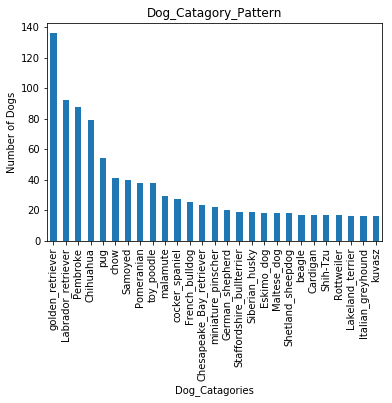

In [769]:
p1_value_counts = twitter_archive_master['p1'].value_counts()
p1_value_extracted = p1_value_counts[p1_value_counts > 15]
Dog_plot = p1_value_extracted.plot(kind = 'bar')
Dog_plot.set_title("Dog_Catagory_Pattern")
Dog_plot.set_xlabel("Dog_Catagories")
Dog_plot.set_ylabel("Number of Dogs");
plt.savefig('fig_1.png',  bbox_inches='tight')

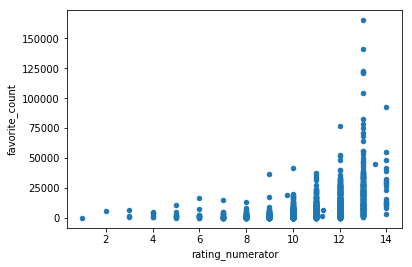

In [770]:
twitter_archive_master.plot.scatter(x = 'rating_numerator', y ='favorite_count');
plt.savefig('fig_2.png',  bbox_inches='tight')

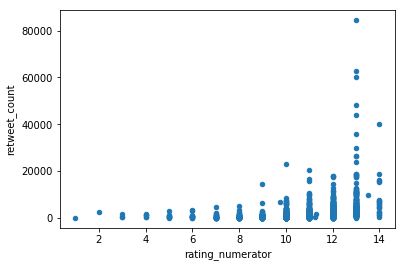

In [771]:
twitter_archive_master.plot.scatter(x = 'rating_numerator', y ='retweet_count');
plt.savefig('fig_3.png',  bbox_inches='tight')

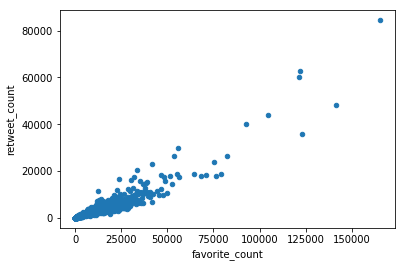

In [772]:
twitter_archive_master.plot.scatter(x = 'favorite_count', y ='retweet_count');
plt.savefig('fig_4.png',  bbox_inches='tight')

In [773]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)